# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ BERT –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏



## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∏–±–ª–∏–æ—Ç–µ–∫—É [Transformers](https://huggingface.co/transformers/) –æ—Ç Hugging Face

In [1]:
!pip install -q -U watermark

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy       : 1.26.4
pandas      : 2.2.2
torch       : 2.5.1+cu121
transformers: 4.47.1



–ó–∞–≥—Ä—É–∑–∏–º –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–π –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ -- –æ—Ç–∑—ã–≤—ã –Ω–∞ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –≤ Google Play.


In [3]:
!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: /content/apps.csv
100% 134k/134k [00:00<00:00, 6.88MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: /content/reviews.csv
100% 7.17M/7.17M [00:00<00:00, 44.0MB/s]


In [4]:
import transformers
from transformers import BertModel, AutoTokenizer, BertTokenizer, PreTrainedTokenizerFast, AdamW, get_linear_schedule_with_warmup
import torch.nn.functional as F

import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.nn.utils import clip_grad_norm_
from torch.utils.data import Dataset, DataLoader


In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 6

In [6]:
df = pd.read_csv("reviews.csv")

In [7]:
df.shape

(15746, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15746 entries, 0 to 15745
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              15746 non-null  object
 1   userImage             15746 non-null  object
 2   content               15746 non-null  object
 3   score                 15746 non-null  int64 
 4   thumbsUpCount         15746 non-null  int64 
 5   reviewCreatedVersion  13533 non-null  object
 6   at                    15746 non-null  object
 7   replyContent          7367 non-null   object
 8   repliedAt             7367 non-null   object
 9   sortOrder             15746 non-null  object
 10  appId                 15746 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [9]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [10]:
df.head()

userName                                          userImage  \
0     Andrew Thomas  https://lh3.googleusercontent.com/a-/AOh14GiHd...   
1      Craig Haines  https://lh3.googleusercontent.com/-hoe0kwSJgPQ...   
2     steven adkins  https://lh3.googleusercontent.com/a-/AOh14GiXw...   
3  Lars Panzerbj√∏rn  https://lh3.googleusercontent.com/a-/AOh14Gg-h...   
4     Scott Prewitt  https://lh3.googleusercontent.com/-K-X1-YsVd6U...   

                                             content  score  thumbsUpCount  \
0  Update: After getting a response from the deve...      1             21   
1  Used it for a fair amount of time without any ...      1             11   
2  Your app sucks now!!!!! Used to be good but no...      1             17   
3  It seems OK, but very basic. Recurring tasks n...      1            192   
4  Absolutely worthless. This app runs a prohibit...      1             42   

  reviewCreatedVersion                   at  \
0             4.17.0.3  2020-04-05 22:25:57   
1             4.17.0.3  2020-04-04 13:40:01   
2             4.17.0.3  2020-04-01 16:18:13   
3             4.17.0.2  2020-03-12 08:17:34   
4             4.17.0.2  2020-03-14 17:41:01   

                                        replyContent            repliedAt  \
0  According to our TOS, and the term you have ag...  2020-04-05 15:10:24   
1  It sounds like you logged in with a different ...  2020-04-05 15:11:35   
2  This sounds odd! We are not aware of any issue...  2020-04-02 16:05:56   
3  We do offer this option as part of the Advance...  2020-03-15 06:20:13   
4  We're sorry you feel this way! 90% of the app ...  2020-03-15 23:45:51   

       sortOrder      appId  
0  most_relevant  com.anydo  
1  most_relevant  com.anydo  
2  most_relevant  com.anydo  
3  most_relevant  com.anydo  
4  most_relevant  com.anydo

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ

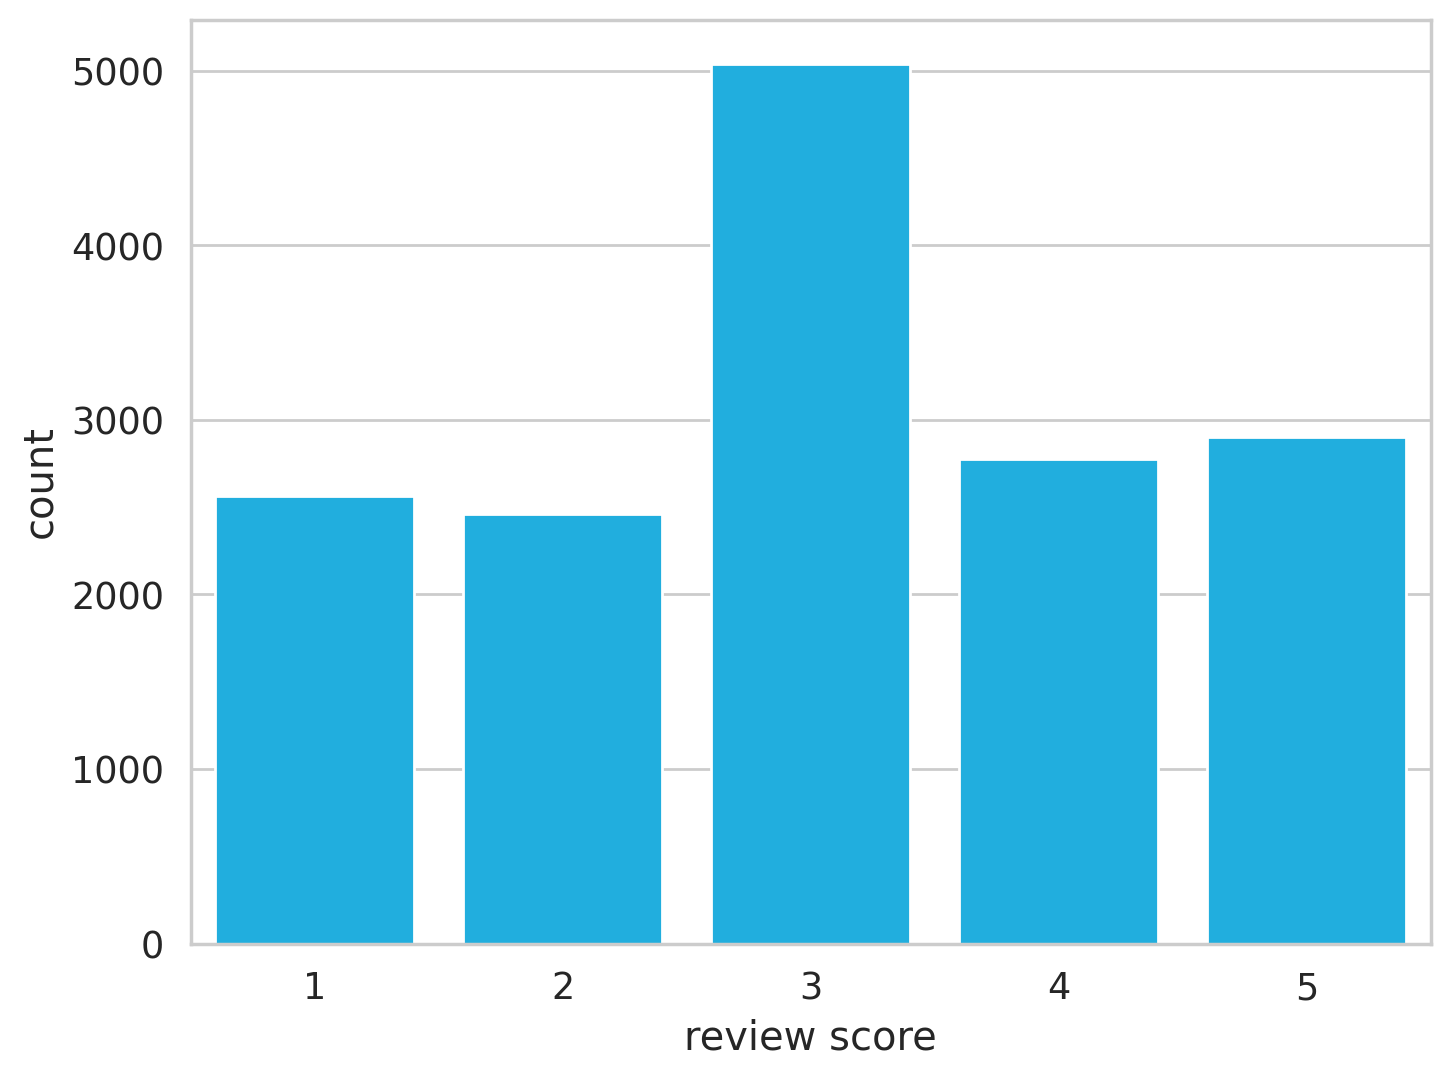

In [11]:
sns.countplot(x=df.score)
plt.xlabel('review score');

–ú–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã.
–¢–µ–ø–µ—Ä—å –ø—Ä–∏–≤–µ–¥–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –∫ –¥—Ä—É–≥–æ–º—É –≤–∏–¥—É -- —Ä–∞–∑–¥–µ–ª–∏–º –∏—Ö –Ω–∞ 3 –∫–ª–∞—Å—Å–∞: –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ, –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ.

In [12]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

df['sentiment'] = df.score.apply(to_sentiment)

In [13]:
class_names = ['negative', 'neutral', 'positive']

<ipython-input-14-c8622670199a>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names);


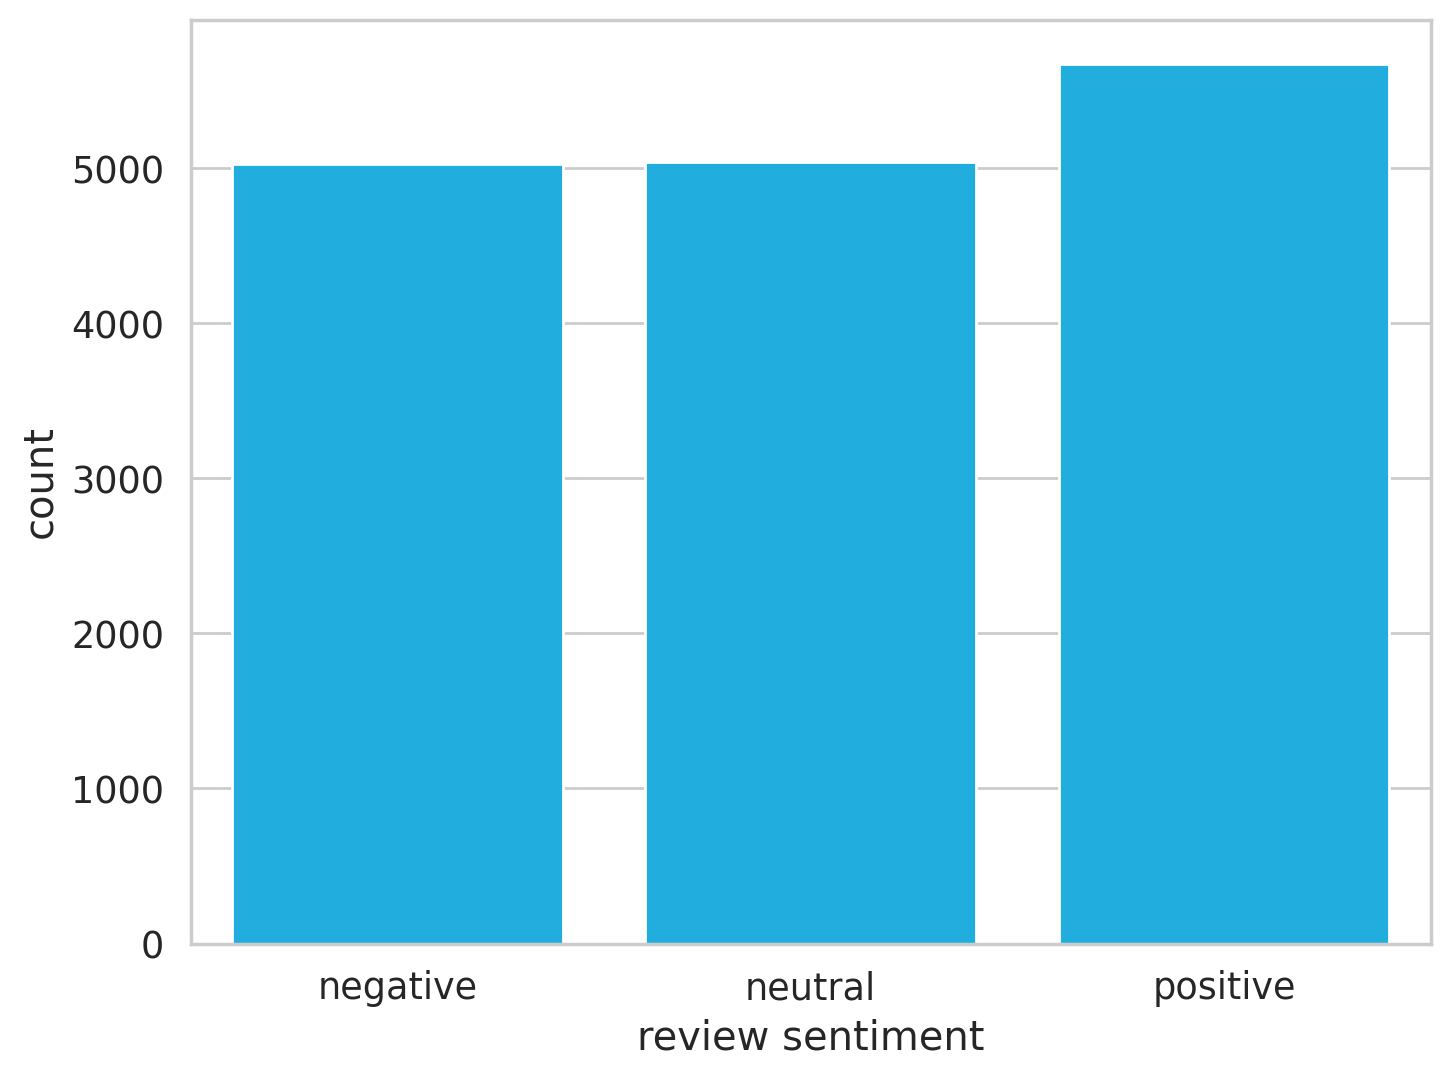

In [14]:
ax = sns.countplot(x=df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

–í —Ç–∞–∫–æ–º –≤–∏–¥–µ –∫–ª–∞—Å—Å—ã –ø–æ—á—Ç–∏ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã.

In [15]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

–ó–∞–≥—Ä—É–∑–∏–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π [BertTokenizer](https://huggingface.co/transformers/model_doc/bert.html#berttokenizer):

In [16]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –º–æ–¥–µ–ª—å —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –¥–ª—è BERT.



In [17]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


In [18]:
sample_txt = 'He started a new book, it was quite readable'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: He started a new book, it was quite readable
   Tokens: ['He', 'started', 'a', 'new', 'book', ',', 'it', 'was', 'quite', 'read', '##able']
Token IDs: [1124, 1408, 170, 1207, 1520, 117, 1122, 1108, 2385, 2373, 1895]




`[SEP]` - –º–µ—Ç–∫–∞ –∫–æ–Ω—Ü–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è


In [19]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

`[CLS]` - —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å BERT –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –º—ã –¥–æ–ª–∂–Ω—ã –¥–æ–±–∞–≤–∏—Ç—å —ç—Ç–æ—Ç —Ç–æ–∫–µ–Ω –≤ –Ω–∞—á–∞–ª–æ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

In [20]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

–¢–∞–∫–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–π —Ç–æ–∫–µ–Ω –¥–ª—è –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏—è –¥–ª–∏–Ω –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π

In [21]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

–í—Å—è —ç—Ç–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ encode_plus

In [22]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # –î–æ–±–∞–≤–∏—Ç—å '[CLS]' –∏ '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # –í–µ—Ä–Ω—É—Ç—å —Ç–µ–Ω–∑–æ—Ä PyTorch
  truncation=True
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [23]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([ 101, 1124, 1408,  170, 1207, 1520,  117, 1122, 1108, 2385, 2373, 1895,
         102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

–¢–∞–∫–∞—è –∂–µ –¥–ª–∏–Ω–∞ –±—É–¥–µ—Ç –∏ —É *attention mask*

In [24]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [25]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])


['[CLS]',
 'He',
 'started',
 'a',
 'new',
 'book',
 ',',
 'it',
 'was',
 'quite',
 'read',
 '##able',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

–£—Å—Ç–∞–Ω–æ–≤–∏–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞–≤–Ω–æ–π 160

In [26]:
MAX_LEN = 160

–¢–µ–ø–µ—Ä—å —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Å–µ—Ç PyTorch, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

In [27]:

class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, —Ç–µ—Å—Ç–æ–≤—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏

In [28]:
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [29]:
device

device(type='cuda', index=0)

In [30]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [31]:
df_train.shape, df_val.shape, df_test.shape

((14171, 12), (787, 12), (788, 12))


–°–æ–∑–¥–∞–¥–∏–º –∏—Ç–µ—Ä–∞—Ç–æ—Ä—ã –ø–æ –¥–∞–Ω–Ω—ã–º
- train_data_loader - –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
- val_data_loader - –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏
- test_data_loader - –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=1
  )

In [34]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –æ–¥–Ω–æ–≥–æ –±–∞—Ç—á–∞ –∏–∑ –Ω–∞—à–µ–≥–æ –∏—Ç–µ—Ä–∞—Ç–æ—Ä–∞ train_data_loader



In [35]:
data = next(iter(train_data_loader))

In [36]:
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [37]:
print(data['review_text'])
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

["I had a problem with upgrading to Premium. They were quick with their response and fixed the problem right away. It's a good app for those familiar with the Franklin Covey system, and syncs well across devices.", 'Same issue as Don Smith who wrote a review on 10/10/19. Will consider this app but the lack of slide visuals and character visuals makes the app in-op. Current phone is the Google pixel 4xl......perhaps I misspoke in regards to the reply. My issue is not with the visuals but the lack of visuals. Everything is blank for me so literally can not see half of the content.', "I actually really love this app. I used it to create some serious personal progress. I purchased the full app but when I bought a new phone, it wouldn't let me sign out of my old device and into my new device. I emailed support about it...crickets. Never heard from them. If they can put together a decent support team I would give the app a 5 for sure.", 'But of a downgrade from wunderlist. Please add a butto

In [38]:
data['targets']

tensor([2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2])

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ BERT –æ—Ç Hugging Face


–í –±–∏–±–ª–∏–æ—Ç–µ–∫–µ Transformers –æ—Ç Hugging Face –µ—Å—Ç—å –º–Ω–æ–≥–æ –º–æ–¥–µ–ª–µ–π –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –∑–∞–¥–∞—á: [BertForSequenceClassification](https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification), [BertForQuestionAnswering](https://huggingface.co/transformers/model_doc/bert.html#bertforquestionanswering) –∏ –¥—Ä—É–≥–∏–µ. –í—Å–µ –æ–Ω–∏ —è–≤–ª—è—é—Ç—Å—è –Ω–∞–¥—Å—Ç—Ä–æ–π–∫–∞–º–∏ –Ω–∞–¥ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª—å—é BERT.

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∞–∑–æ–≤—É—é –º–æ–¥–µ–ª—å [BertModel](https://huggingface.co/transformers/model_doc/bert.html#bertmodel) –∏ —Ä–µ–∞–ª–∏–∑—É–µ–º –Ω–∞ –µ—ë –æ—Å–Ω–æ–≤–µ —Å–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏.

In [39]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [40]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'He',
 'started',
 'a',
 'new',
 'book',
 ',',
 'it',
 'was',
 'quite',
 'read',
 '##able',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [41]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
last_hidden_state, pooled_output, hidden_states = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask'],
  output_hidden_states=True,
  return_dict=False)


–í –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é last_hidden_state —Ç–µ–ø–µ—Ä—å –∑–∞–ø–∏—Å–∞–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–∫—Ä—ã—Ç—ã—Ö —Å–æ—Å—Ç–æ—è–Ω–∏–π –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è –º–æ–¥–µ–ª–∏.

In [43]:
print(last_hidden_state.shape)
print(pooled_output.shape)
print(len(hidden_states))

torch.Size([1, 32, 768])
torch.Size([1, 768])
13


In [44]:
for state in hidden_states:
  print(state.shape)

torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])
torch.Size([1, 32, 768])


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ BERT —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–æ–≤ –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è—Ö.

In [45]:
text1 = df.loc[16]['content']
text2 = df.loc[338]['content']
print(text1)
print(text2)

Couldn't even set up one single recurring reminder without being required to pay monthly subscription. Get your greedy hand off it dev. It's only only a reminder app not a useful service.
Well designed and all however alot of the crutial features are locked behind the premium which u need to pay for


In [46]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer2 = PreTrainedTokenizerFast.from_pretrained(PRE_TRAINED_MODEL_NAME)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [47]:
tokenizer2.sep_token = tokenizer.sep_token
tokenizer2.pad_token = tokenizer.pad_token

In [48]:
encoding = tokenizer.encode_plus(
  text1,
  max_length=30,
  add_special_tokens=True, # –î–æ–±–∞–≤–∏—Ç—å '[CLS]' –∏ '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # –í–µ—Ä–Ω—É—Ç—å —Ç–µ–Ω–∑–æ—Ä PyTorch
  truncation=True
)

In [49]:
encoding2 = tokenizer2.encode_plus(
  text1,
  max_length=50,
  add_special_tokens=True, # –î–æ–±–∞–≤–∏—Ç—å '[CLS]' –∏ '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # –í–µ—Ä–Ω—É—Ç—å —Ç–µ–Ω–∑–æ—Ä PyTorch
  truncation=True,
  return_offsets_mapping=True
)

In [50]:
print(encoding.keys())
print(encoding2.keys())

dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask', 'offset_mapping'])


In [51]:
encoding2['offset_mapping']

tensor([[[  0,   0],
         [  0,   6],
         [  6,   7],
         [  7,   8],
         [  9,  13],
         [ 14,  17],
         [ 18,  20],
         [ 21,  24],
         [ 25,  31],
         [ 32,  41],
         [ 42,  50],
         [ 51,  58],
         [ 59,  64],
         [ 65,  73],
         [ 74,  76],
         [ 77,  80],
         [ 81,  88],
         [ 89, 101],
         [101, 102],
         [103, 106],
         [107, 111],
         [112, 118],
         [119, 123],
         [124, 127],
         [128, 130],
         [131, 133],
         [133, 134],
         [134, 135],
         [136, 138],
         [138, 139],
         [139, 140],
         [141, 145],
         [146, 150],
         [151, 152],
         [153, 161],
         [162, 165],
         [166, 169],
         [170, 171],
         [172, 178],
         [179, 186],
         [186, 187],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0

In [52]:
encoding['input_ids']

tensor([[  101, 23320,   112,   189,  1256,  1383,  1146,  1141,  1423, 10993,
         15656,  1443,  1217,  2320,  1106,  2653,  7868, 16759,   119,  3949,
          1240, 24007,  1289,  1228,  1122,  1260,  1964,   119,  1135,   102]])

In [53]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask'],
  return_dict=False)

In [54]:
print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))

['[CLS]', 'Couldn', "'", 't', 'even', 'set', 'up', 'one', 'single', 'recurring', 'reminder', 'without', 'being', 'required', 'to', 'pay', 'monthly', 'subscription', '.', 'Get', 'your', 'greedy', 'hand', 'off', 'it', 'de', '##v', '.', 'It', '[SEP]']


In [55]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]).index('subscription')

17

In [56]:
emb1 = last_hidden_state[0, 17]
emb1.shape

torch.Size([768])

In [57]:
encoding2 = tokenizer.encode_plus(
  text2,
  max_length=30,
  add_special_tokens=True, # –î–æ–±–∞–≤–∏—Ç—å '[CLS]' –∏ '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # –í–µ—Ä–Ω—É—Ç—å —Ç–µ–Ω–∑–æ—Ä PyTorch
  truncation=True
)

last_hidden_state2, pooled_output2 = bert_model(
  input_ids=encoding2['input_ids'],
  attention_mask=encoding2['attention_mask'],
  return_dict=False)

In [58]:
tokenizer.convert_ids_to_tokens(encoding2['input_ids'][0])

['[CLS]',
 'Well',
 'designed',
 'and',
 'all',
 'however',
 'al',
 '##ot',
 'of',
 'the',
 'c',
 '##ru',
 '##tial',
 'features',
 'are',
 'locked',
 'behind',
 'the',
 'premium',
 'which',
 'u',
 'need',
 'to',
 'pay',
 'for',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [59]:
tokenizer.convert_ids_to_tokens(encoding2['input_ids'][0]).index('premium')

18

In [60]:
emb2 = last_hidden_state2[0, 1]
emb2.shape

torch.Size([768])

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
cosine_similarity( [emb1.detach().cpu().numpy()], [emb2.detach().cpu().numpy()])

array([[0.5046449]], dtype=float32)

–û–ø–∏—à–µ–º –Ω–∞–∫–æ–Ω–µ—Ü –Ω–∞—à –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞ –æ—Å–Ω–æ–≤–µ BertModel

## SentimentClassifierWithCLS

In [104]:
class SentimentClassifierWithCLS(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased') # –í–µ—Ä—Å–∏—è BERT, –∫–æ—Ç–æ—Ä–∞—è –Ω–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–∞ –∫ —Ä–µ–≥–∏—Å—Ç—Ä—É
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) # –í—ã—Ö–æ–¥–Ω–æ–π –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)
        cls_token_output = outputs[0][:, 0, :]  # –ü–æ–ª—É—á–∞–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥ CLS-—Ç–æ–∫–µ–Ω–∞ (–ø–µ—Ä–≤—ã–π —Ç–æ–∫–µ–Ω –∫–∞–∂–¥–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏)
        output = self.drop(cls_token_output) # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º CLS-—ç–º–±–µ–¥–¥–∏–Ω–≥ —á–µ—Ä–µ–∑ —Å–ª–æ–π Dropout
        logits = self.out(output) # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
        return logits

In [105]:
model = SentimentClassifierWithCLS(len(class_names))
model = model.to(device)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

–ü–µ—Ä–µ–Ω–µ—Å–µ–º –Ω–∞ GPU –æ–¥–∏–Ω –∏–∑ –Ω–∞—à–∏—Ö –±–∞—Ç—á–µ–π (–¥–ª—è –ø—Ä–∏–º–µ—Ä–∞).

In [106]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


–ü—Ä–∏–º–µ–Ω–∏–º –º–æ–¥–µ–ª—å –∫ –¥–∞–Ω–Ω—ã–º.

In [107]:
output = model(input_ids, attention_mask)
output

tensor([[-0.2888,  0.3099,  0.1946],
        [ 0.1075,  0.2228,  0.0791],
        [-0.3950,  0.3237,  0.1990],
        [ 0.0895,  0.1006, -0.2532],
        [ 0.2207,  0.1101,  0.1348],
        [-0.2403,  0.4765,  0.4011],
        [-0.0851,  0.1816,  0.6154],
        [ 0.0407,  0.1709,  0.4098],
        [ 0.1049,  0.0982,  0.0412],
        [-0.3842, -0.0981,  0.3466],
        [-0.0109,  0.1464,  0.1198],
        [-0.2884, -0.0037,  0.0436],
        [ 0.1726, -0.1186,  0.0168],
        [-0.2454,  0.1591,  0.5098],
        [ 0.1066, -0.0021, -0.1139],
        [-0.0925,  0.2641,  0.3173]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

–ï—Å–ª–∏ —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤, –ø—Ä–∏–º–µ–Ω—è–µ–º SoftMax –∫ –≤—ã—Ö–æ–¥—É –º–æ–¥–µ–ª–∏.

In [108]:
F.softmax(output, dim=1)

tensor([[0.2252, 0.4097, 0.3651],
        [0.3232, 0.3627, 0.3141],
        [0.2056, 0.4219, 0.3724],
        [0.3675, 0.3716, 0.2609],
        [0.3555, 0.3183, 0.3262],
        [0.2021, 0.4140, 0.3839],
        [0.2315, 0.3022, 0.4663],
        [0.2789, 0.3177, 0.4034],
        [0.3411, 0.3388, 0.3201],
        [0.2269, 0.3020, 0.4711],
        [0.3021, 0.3536, 0.3443],
        [0.2686, 0.3571, 0.3743],
        [0.3841, 0.2871, 0.3287],
        [0.2161, 0.3239, 0.4600],
        [0.3705, 0.3323, 0.2972],
        [0.2541, 0.3630, 0.3829]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏


–î–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Hugging Face.



–ê–≤—Ç–æ—Ä—ã –º–æ–¥–µ–ª–∏ BERT —Ä–µ–∫–æ–º–µ–Ω–¥—É—é—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏:
- –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞: 16, 32
- Learning rate (—Å –æ–ø—Ç–∏–º–∞–π–∑–µ—Ä–æ–º Adam): 5e-5, 3e-5, 2e-5
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö: 2, 3, 4

In [109]:

#–∫–∞–∫ –∑–∞–º–æ—Ä–æ–∑–∏—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å–ª–æ–∏
freeze_layers = list(range(5))
for layer_id in freeze_layers:
  for param in list(model.bert.encoder.layer[layer_id].parameters()):
    param.requires_grad = False


In [110]:
list(model.bert.encoder.layer[3].parameters())[0]

Parameter containing:
tensor([[ 0.0586, -0.0279,  0.0022,  ..., -0.0205,  0.0419,  0.0560],
        [-0.0011,  0.1283, -0.0564,  ..., -0.0514, -0.0199,  0.0516],
        [-0.0083,  0.0060, -0.0469,  ...,  0.0569, -0.0073, -0.0616],
        ...,
        [ 0.0118,  0.0645, -0.0159,  ..., -0.0027, -0.0031, -0.0141],
        [ 0.0029,  0.0531,  0.0221,  ..., -0.0047,  0.0399,  0.0344],
        [ 0.0512,  0.0246,  0.0077,  ...,  0.0108,  0.0262,  0.0081]],
       device='cuda:0')

In [111]:
EPOCHS = 2

#optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

–†–µ–∞–ª–∏–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ–¥–Ω–æ–π —ç–ø–æ—Ö–∏ –æ–±—É—á–µ–Ω–∏—è

In [112]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    preds = torch.argmax(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions / n_examples, np.mean(losses)

–¢–∞–∫–∂–µ —Ä–µ–∞–ª–∏–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ data_loader

In [113]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      preds = torch.argmax(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions / n_examples, np.mean(losses)

–ò—Å–ø–æ–ª—å–∑—É—è —ç—Ç–∏ –¥–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏, –æ–ø–∏—Å–∞–Ω–Ω—ã–µ –≤—ã—à–µ, —Ä–µ–∞–ª–∏–∑—É–µ–º –ø—Ä–æ—Ü–µ–¥—É—Ä—É –¥–æ–æ–±—É—á–µ–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏

In [114]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/2
----------
Train loss 0.993987254243403 accuracy 0.4729377031326294
Val loss 0.825916873216629 accuracy 0.5984752178192139

Epoch 2/2
----------
Train loss 0.7806394323874811 accuracy 0.631359875202179
Val loss 0.8225767236948013 accuracy 0.6035577654838562

CPU times: user 9min 22s, sys: 1min 47s, total: 11min 10s
Wall time: 11min 31s



–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –º—ã —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤–µ—Å–∞ –Ω–∞–∏–ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∑–∞–Ω–∏–º–∞–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –≤—Ä–µ–º—è. –¢–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.

In [115]:
history['train_acc'] = [score.to('cpu') for score in  history['train_acc']]
history['val_acc'] = [score.to('cpu') for score in  history['val_acc']]

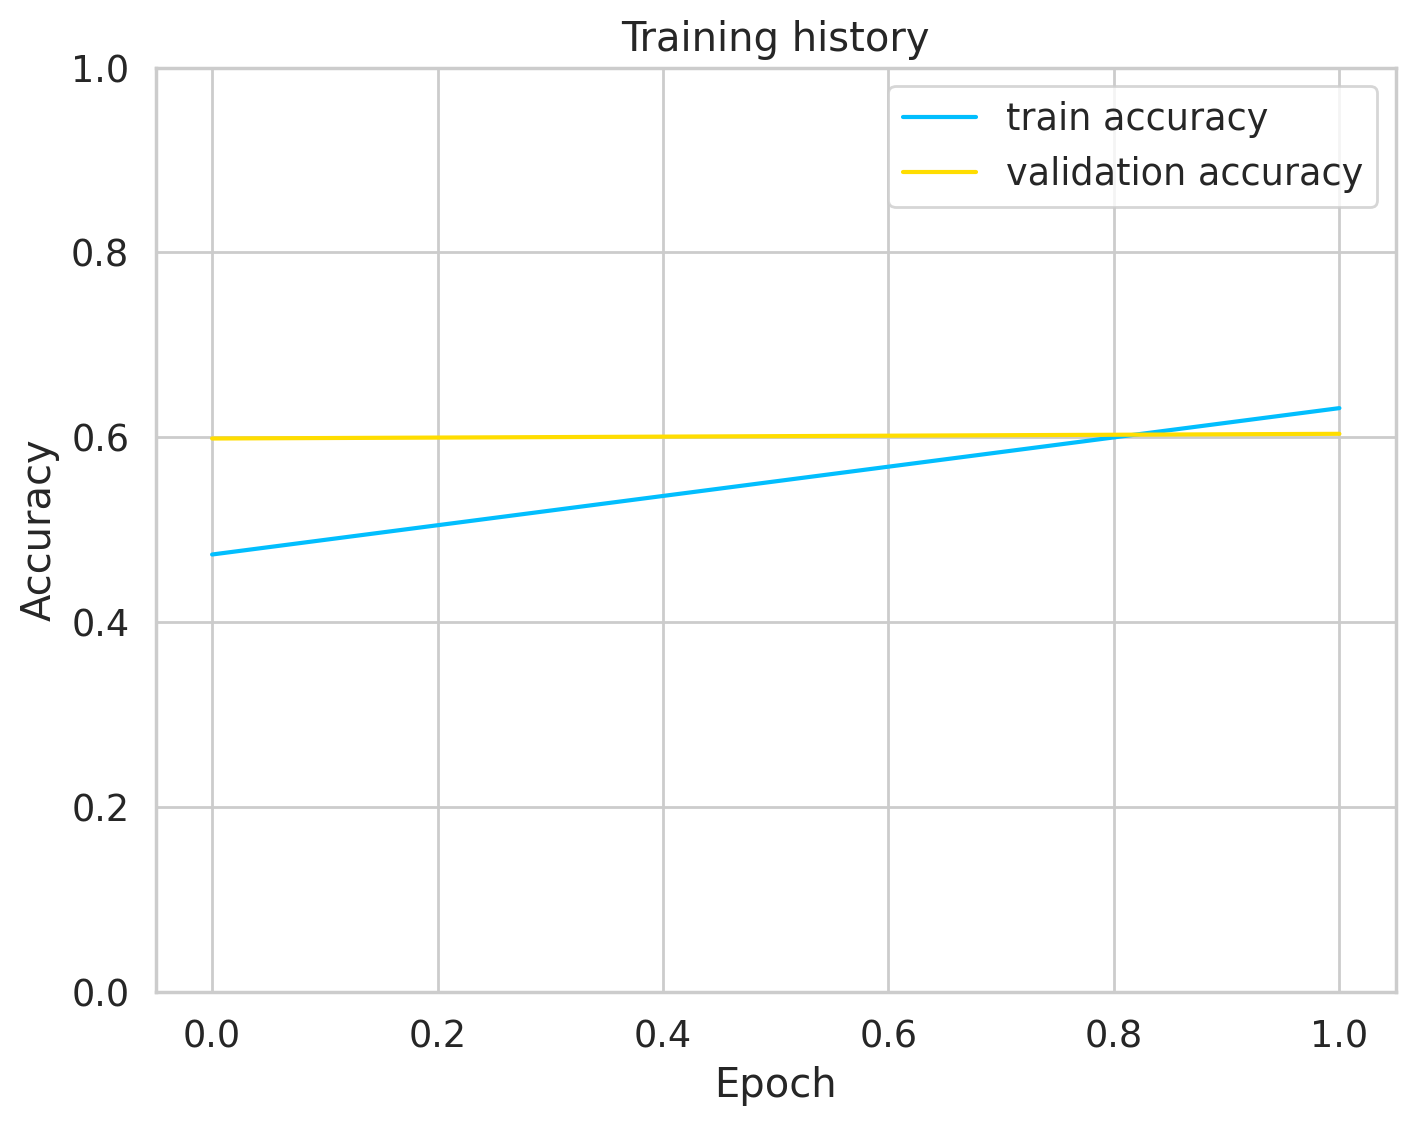

In [116]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [76]:
'''
model = SentimentClassifier(len(class_names))
model.load_state_dict(torch.load('best_model_state.bin'))
model = model.to(device)
'''

"\nmodel = SentimentClassifier(len(class_names))\nmodel.load_state_dict(torch.load('best_model_state.bin'))\nmodel = model.to(device)\n"

## –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏

–ü–æ–¥—Å—á–∏—Ç–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å (accuracy) –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [118]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.5913705229759216

Accuracy –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–∞—é—Ç –±–ª–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –ø–æ–ª—É—á–∏–≤—à–∞—è—Å—è –º–æ–¥–µ–ª—å –æ–±–ª–∞–¥–∞–µ—Ç —Ö–æ—Ä–æ—à–µ–π –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é.

–¢–µ–ø–µ—Ä—å —Ä–µ–∞–ª–∏–∑—É–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø–æ–ª—É—á–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏–∑ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏.

In [119]:
def get_predictions(model, data_loader):
  model = model.eval()

  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      preds = torch.argmax(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [120]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model, test_data_loader)

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [121]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.69      0.52      0.59       262
     neutral       0.41      0.40      0.41       235
    positive       0.66      0.81      0.73       291

    accuracy                           0.59       788
   macro avg       0.58      0.58      0.57       788
weighted avg       0.59      0.59      0.59       788



–ò–∑ –¥–∞–Ω–Ω–æ–≥–æ –æ—Ç—á–µ—Ç–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ —Å–ª–æ–∂–Ω–µ–µ –≤—Å–µ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã. –¢–∞–∫–∂–µ –∫–∞–∫ –∏ –Ω–∞ –æ–±—ã—á–Ω–æ–º SentimentClassifier

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –Ω–∞ confusion matrix –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

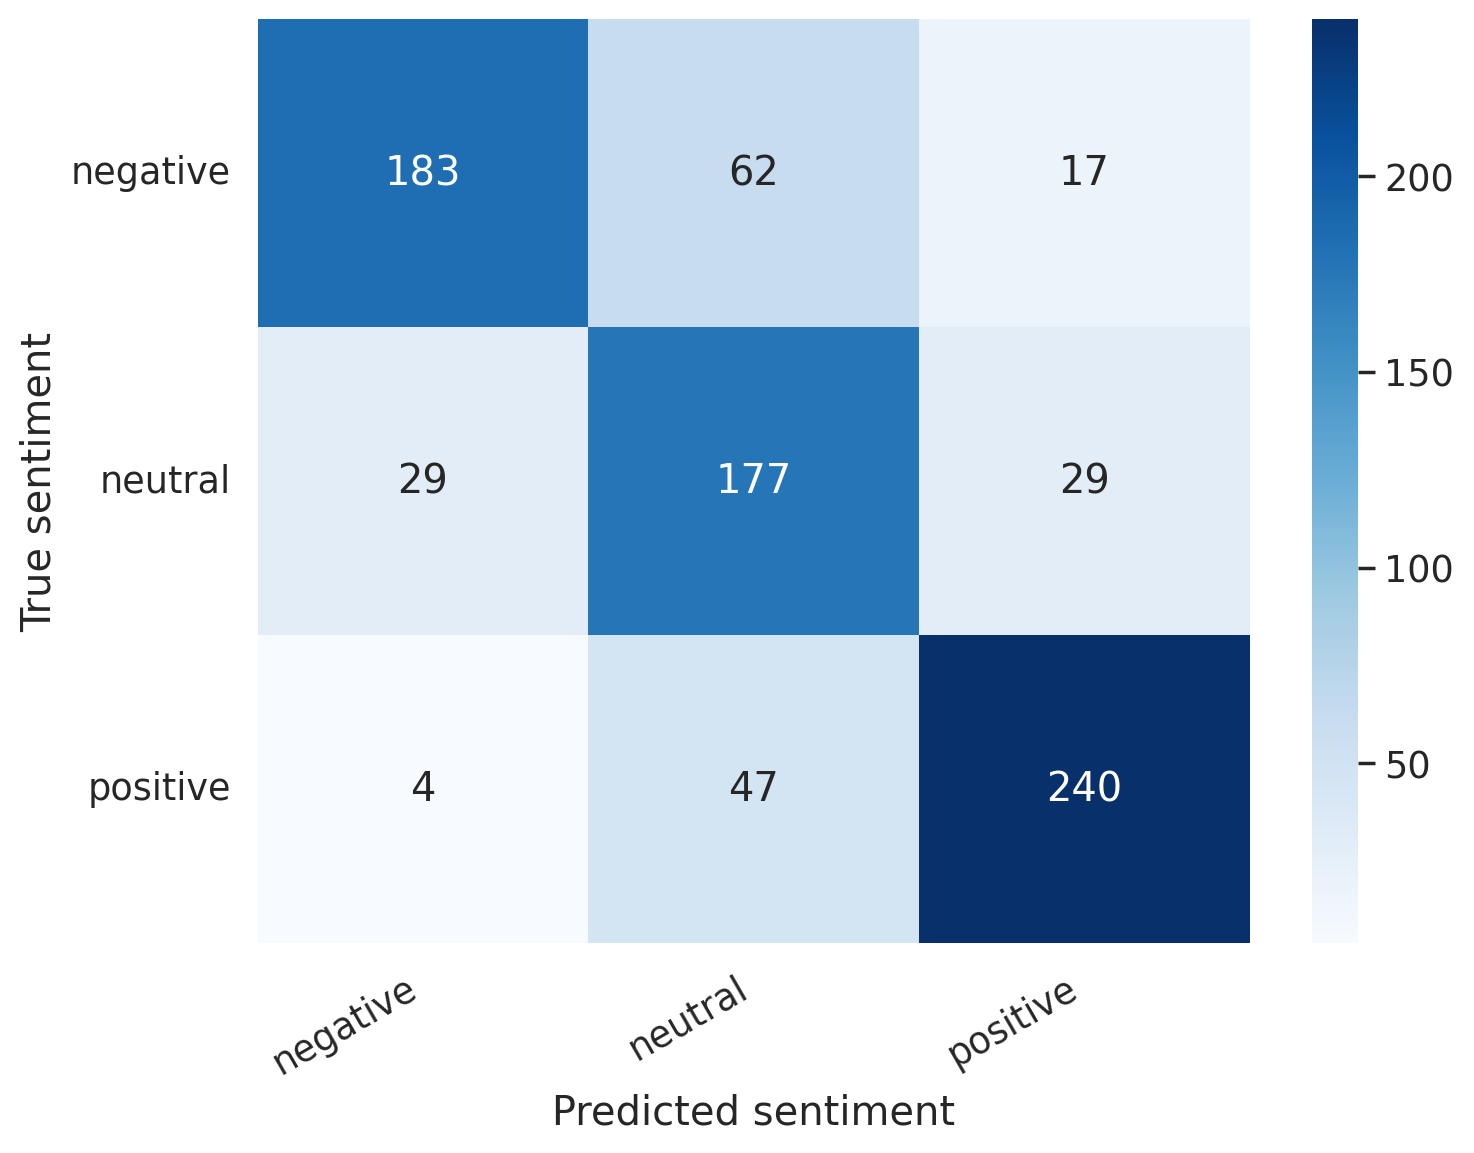

In [81]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

–ó–¥–µ—Å—å —Ç–∞–∫–∂–µ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª–∏ —Å–ª–æ–∂–Ω–µ–µ –≤—Å–µ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã.

In [82]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [83]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

Good

True sentiment: negative


## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö

–¢–µ–ø–µ—Ä—å –Ω–∞–º –æ—Å—Ç–∞–ª–æ—Å—å –Ω–∞—É—á–∏—Ç—å—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞—à—É –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –ª—é–±–æ–≥–æ —Ç–µ–∫—Å—Ç–∞.

In [84]:
review_text = "I love completing my todos! Best app ever!!!"

–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞–º —Å–ª–µ–¥—É–µ—Ç —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º.

In [85]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',
  truncation=True
)

–¢–µ–ø–µ—Ä—å –ø–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏.

In [86]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
prediction = torch.argmax(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive


In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super().__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
model = SentimentClassifierWithCLS(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

##Trainer –æ—Ç HuggingFace

–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ HuggingFace –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —É–ø—Ä–æ—â–∞—é—Ç –æ–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫—É –º–æ–¥–µ–ª–µ–π, –≤—ã–ª–æ–∂–µ–Ω–Ω—ã—Ö –≤ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π –±–∏–±–ª–∏–æ—Ç–µ–∫–∏. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —ç—Ç–∏ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –∑–∞–¥–∞—á–∏ –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏. –ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å –∏ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ imdb, —Å–æ—Å—Ç–æ—è—â–µ–º –∏–∑ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ —Ñ–∏–ª—å–º–∞—Ö.

–û—Ä–∏–≥–∏–Ω–∞–ª: https://huggingface.co/transformers/custom_datasets.html#sequence-classification-with-imdb-reviews

–î–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π datasets, —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–π HuggingFace. –î–∞–Ω–Ω–∞—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –±—ã—Å—Ç—Ä–æ –∏ —É–¥–æ–±–Ω–æ —Å–∫–∞—á–∏–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –±–µ–Ω—á–º–∞—Ä–∫–∏: https://huggingface.co/datasets

In [87]:
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 13.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 17.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

In [88]:
from datasets import load_dataset

imdb_dataset = load_dataset('imdb')

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [89]:
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [90]:
#imdb_dataset["train"]["text"][:10]

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [91]:
imdb_dataset["train"]["label"][:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

–°–æ–∫—Ä–∞—Ç–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤, —á—Ç–æ–±—ã –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –±—ã–ª –±—ã—Å—Ç—Ä–µ–µ.

In [92]:
train_texts = imdb_dataset["train"]["text"][:2000]
train_labels = imdb_dataset["train"]["label"][:2000]
test_texts = imdb_dataset["test"]["text"][:1000]
test_labels = imdb_dataset["test"]["label"][:1000]

In [93]:
del imdb_dataset

–í—ã–¥–µ–ª–∏–º —á–∞—Å—Ç—å –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ—Ü–µ–Ω–∫–∏:

In [94]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)

–¢–æ–∫–µ–Ω–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ

In [95]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [96]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

–°–æ–∑–¥–∞–¥–∏–º –∫–ª–∞—Å—Å Dataset, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –±—É–¥–µ—Ç –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤ –∏ –∫–ª–∞—Å—Å:

In [97]:
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

–û–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫, –∫–æ—Ç–æ—Ä—ã–µ —Ö–æ—Ç–∏–º —É–≤–∏–¥–µ—Ç—å –ø—Ä–∏ –æ—Ü–µ–Ω–∫–µ –º–æ–¥–µ–ª–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –±—É–¥–µ—Ç –≤—ã—á–∏—Å–ª—è—Ç—å—Å—è —Ç–æ–ª—å–∫–æ loss):

In [98]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

–ó–∞–¥–∞–¥–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é TrainingArguments:

In [99]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å –∏ –∑–∞–ø—É—Å—Ç–∏–º fine-tune –µ–µ —Å –ø–æ–º–æ—â—å—é –º–æ–¥—É–ª—è Trainer. –í –¥–∞–Ω–Ω–æ–º –º–æ–¥—É–ª–µ –±—É–¥–µ—Ç –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –∏—Ç–µ—Ä–∞—Ü–∏—è –ø–æ —ç–ø–æ—Ö–∞–º, –±–∞—Ç—á–∞–º, —Ä–∞—Å—Å—á–µ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, –Ω–∏—á–µ–≥–æ —ç—Ç–æ–≥–æ –±–æ–ª—å—à–µ —Ä—É–∫–∞–º–∏ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ!

In [100]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [101]:
trainer = Trainer(
    model=model,                         # the instantiated ü§ó Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics = compute_metrics    # metrics to evaluate
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=400, training_loss=0.09649147254269337, metrics={'train_runtime': 1552.1401, 'train_samples_per_second': 2.062, 'train_steps_per_second': 0.258, 'total_flos': 423895675699200.0, 'train_loss': 0.09649147254269337, 'epoch': 2.0})

In [102]:
trainer.evaluate()

{'eval_loss': 9.861694707069546e-05,
 'eval_accuracy': 1.0,
 'eval_f1': 0.0,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_runtime': 6.4701,
 'eval_samples_per_second': 61.823,
 'eval_steps_per_second': 3.864,
 'epoch': 2.0}

–û—Ü–µ–Ω–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [103]:
trainer.evaluate(eval_dataset=test_dataset, metric_key_prefix="test")

{'test_loss': 0.000100059958640486,
 'test_accuracy': 1.0,
 'test_f1': 0.0,
 'test_precision': 0.0,
 'test_recall': 0.0,
 'test_runtime': 16.3781,
 'test_samples_per_second': 61.057,
 'test_steps_per_second': 3.847,
 'epoch': 2.0}